In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
!pip install gensim

    100% |████████████████████████████████| 23.6MB 1.8MB/s 
    100% |████████████████████████████████| 1.4MB 14.2MB/s 
    100% |████████████████████████████████| 133kB 26.7MB/s 
    100% |████████████████████████████████| 61kB 22.8MB/s 
    100% |████████████████████████████████| 4.8MB 6.9MB/s 
    100% |████████████████████████████████| 552kB 14.2MB/s 
  Running setup.py bdist_wheel for smart-open ... - \ done
  Stored in directory: /root/.cache/pip/wheels/23/00/44/e5b939f7a80c04e32297dbd6d96fa3065af89ecf57e2b5f89f
  Running setup.py bdist_wheel for bz2file ... - done
  Stored in directory: /root/.cache/pip/wheels/81/75/d6/e1317bf09bf1af5a30befc2a007869fa6e1f516b8f7c591cb9
Successfully built smart-open bz2file


In [ ]:
#Importing important functions

import pandas as pd
import numpy as np
import os
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.layers import Dense, Input, Flatten, Conv1D, MaxPooling1D, Embedding, Dropout
from keras.models import Model,Sequential
from keras.optimizers import RMSprop, Adam, SGD
import gensim
from keras.datasets import imdb
from matplotlib import pyplot as plt 
import re


In [ ]:
os.chdir("./drive/My Drive/Colab Notebooks")

In [ ]:
#Word2Vec load and Data load 

word2vec_model = gensim.models.KeyedVectors.load_word2vec_format('word2vec.bin',binary=True)
(x_train, y_train), (x_test, y_test) = imdb.load_data()

17465344/17464789 [==============================] - 1s 0us/step


In [ ]:
word_index=imdb.get_word_index()
inv_word_index={v:k for k,v in word_index.items()}

1646592/1641221 [==============================] - 1s 0us/step


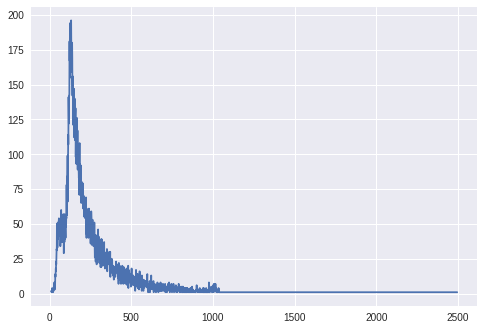

In [ ]:
#Data Exploration

f = [len(x_train[i]) for i in range(len(x_train))]
f = np.array(f)
f = np.unique(f,return_counts=True)
plt.plot(f[0],f[1])

In [ ]:
#Data preprocessing

num_words_per_review = 130
word2vec_dim=300
num_words=len(word_index.keys())


def preprocessing(x):
  x=re.findall(r"[\w']+", x)
  w=[]
  w.append(1)
  for word in x:
    if word.lower() in word_index:
      w.append(word_index[word.lower()])
    else:
      w.append(2)
  return w



def padding(x):
  x=pad_sequences(x,maxlen=num_words_per_review,padding='post',truncating='post')
  return x


In [ ]:
z=[preprocessing("This is good stuff.")]
z=padding(z)

In [ ]:
x_train=padding(x_train)
x_test=padding(x_test)

In [ ]:
#model definition

def define_model(embedding_matrix):
  model=Sequential()
  model.add(Embedding(num_words+1,word2vec_dim,input_length=num_words_per_review,weights=[embedding_matrix]))
  model.add(Conv1D(64,3))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Conv1D(32,3))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Conv1D(16,3))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Flatten())
  model.add(Dropout(0.2))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
  return model

In [ ]:
#word2vec embedding matrix
embedding_matrix = np.random.rand(num_words+1, word2vec_dim)
for word, index in word_index.items():
        if word in word2vec_model:
            embedding_matrix[index] = word2vec_model[word]
model=define_model(embedding_matrix)
model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), epochs=5, batch_size=512, verbose=1)


Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 6s 259us/step - loss: 0.7199 - acc: 0.5082 - val_loss: 0.6857 - val_acc: 0.5496
Epoch 2/5
25000/25000 [==============================] - 4s 161us/step - loss: 0.6466 - acc: 0.6416 - val_loss: 0.6476 - val_acc: 0.6288
Epoch 3/5
25000/25000 [==============================] - 4s 162us/step - loss: 0.5086 - acc: 0.7670 - val_loss: 0.5341 - val_acc: 0.7332
Epoch 4/5
25000/25000 [==============================] - 4s 160us/step - loss: 0.3202 - acc: 0.8689 - val_loss: 0.5218 - val_acc: 0.7453
Epoch 5/5
25000/25000 [==============================] - 4s 161us/step - loss: 0.1850 - acc: 0.9374 - val_loss: 0.5841 - val_acc: 0.7419


In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 400, 300)          26575500  
_________________________________________________________________
conv1d_28 (Conv1D)           (None, 398, 64)           57664     
_________________________________________________________________
max_pooling1d_28 (MaxPooling (None, 99, 64)            0         
_________________________________________________________________
conv1d_29 (Conv1D)           (None, 97, 32)            6176      
_________________________________________________________________
max_pooling1d_29 (MaxPooling (None, 24, 32)            0         
_________________________________________________________________
conv1d_30 (Conv1D)           (None, 22, 16)            1552      
_________________________________________________________________
max_pooling1d_30 (MaxPooling (None, 5, 16)             0         
__________

In [ ]:
#embedding matrix random initialization

embedding_matrix = np.random.rand(num_words+1, word2vec_dim)
model=define_model(embedding_matrix)
model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), epochs=5, batch_size=512, verbose=1)

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 9s 378us/step - loss: 0.7620 - acc: 0.5025 - val_loss: 0.6961 - val_acc: 0.5125
Epoch 2/5
25000/25000 [==============================] - 8s 315us/step - loss: 0.6544 - acc: 0.6338 - val_loss: 0.6900 - val_acc: 0.5330
Epoch 3/5
25000/25000 [==============================] - 8s 316us/step - loss: 0.6095 - acc: 0.7284 - val_loss: 0.6865 - val_acc: 0.5445
Epoch 4/5
25000/25000 [==============================] - 8s 318us/step - loss: 0.5619 - acc: 0.7993 - val_loss: 0.6880 - val_acc: 0.5405
Epoch 5/5
25000/25000 [==============================] - 8s 317us/step - loss: 0.5015 - acc: 0.8420 - val_loss: 0.6701 - val_acc: 0.5809


In [ ]:
#embedding matrix zero initialization

embedding_matrix = np.zeros((num_words+1, word2vec_dim))
model=define_model(embedding_matrix)
model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), epochs=5, batch_size=512, verbose=1)

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 10s 385us/step - loss: 0.6231 - acc: 0.6436 - val_loss: 0.4493 - val_acc: 0.8012
Epoch 2/5
25000/25000 [==============================] - 8s 314us/step - loss: 0.2913 - acc: 0.8840 - val_loss: 0.3433 - val_acc: 0.8561
Epoch 3/5
25000/25000 [==============================] - 8s 316us/step - loss: 0.1196 - acc: 0.9588 - val_loss: 0.4944 - val_acc: 0.8374
Epoch 4/5
25000/25000 [==============================] - 8s 315us/step - loss: 0.0476 - acc: 0.9855 - val_loss: 0.6712 - val_acc: 0.8325
Epoch 5/5
25000/25000 [==============================] - 8s 315us/step - loss: 0.0233 - acc: 0.9934 - val_loss: 0.7476 - val_acc: 0.8359


In [ ]:
data=pd.read_csv("ResortData.csv")
data.columns=['review','sentiment']
text=data['review'].values.tolist()
labels=data['sentiment'].values.tolist()

In [ ]:
myset=[]
for l in text:
  myset.append(preprocessing(l))
text=padding(myset)
# myset

In [ ]:
model.evaluate(text,labels)

40/40 [==============================] - 0s 423us/step


[1.4385568618774414, 0.525]

In [ ]:
z=[preprocessing("This is a horrible  movie.")]
z=padding(z)
model.predict(z)

array([[0.80409735]], dtype=float32)